In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [9]:
df = pd.read_csv("../data/adult.csv")
df = df[~df.apply(lambda row: row.astype(str).str.contains(r'\?').any(), axis=1)]

def correct_salary(row):
    salary_value = row["salary"]
    salary_k_value = row["salary K$"]
    
    if salary_k_value <= 50 and salary_value != "<=50K":
        return "<=50K"
    elif salary_k_value > 50 and salary_value != ">50K":
        return ">50K"
    return salary_value

df["salary"] = df.apply(correct_salary, axis=1)

# Task 1
Print the count of men and women in the dataset.

In [12]:
df["sex"].value_counts()

sex
Male      20381
Female     9782
Name: count, dtype: int64

# Task 2
Find the average age of men in dataset

In [13]:
df[df["sex"] == "Male"]["age"].mean() 

np.float64(39.18350424414896)

# Task 3
Get the percentage of people from Poland (native-country)

In [22]:
round((df[df["native-country"] == "Poland"].shape[0] / df.shape[0]) * 100, 2)


0.19

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [31]:
df_greater_50K = df[df["salary K$"] > 50]
print(">50K: ", "mean: ", df_greater_50K["age"].mean(), "    std: ", df_greater_50K["age"].std())
df_less_or_equal_50K = df[df["salary K$"] <= 50]
print("<=50K: ", "mean: ", df_less_or_equal_50K["age"].mean(), "    std: ", df_less_or_equal_50K["age"].std())


>50K:  mean:  43.95911028236548     std:  10.269632835673852
<=50K:  mean:  36.60772456411388     std:  13.464428952303244


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [38]:
education_types = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
df[~df["education"].isin(education_types) & (df["salary"] == ">50K")]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [41]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [50]:
married_mean_salary = df[(df["marital-status"].str.startswith("Married")) & (df["sex"] == "Male")]["salary K$"].mean()
not_married_mean_salary = df[(~df["marital-status"].str.startswith("Married")) & (df["sex"] == "Male")]["salary K$"].mean()
print("married: ", married_mean_salary, "   not married: ", not_married_mean_salary)

married:  107.49455968688845    not married:  46.59361030765185


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [52]:
df[df["hours-per-week"] == df["hours-per-week"].max()].shape[0]

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

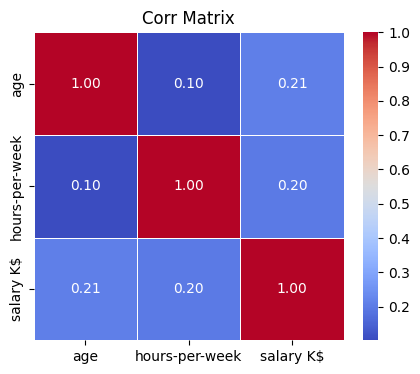

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt


num_columns = df.select_dtypes(include=["number"]).columns
corr_matrix = df[[col for col in num_columns if col != "Unnamed: 0"]].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corr Matrix")
plt.show()
